In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
lang = pd.read_excel("student_lang.xlsx")

In [3]:
lang.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
lang.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [5]:
lang.dtypes[lang.dtypes == 'int64'].index.values

array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'], dtype=object)

In [6]:
lang['Pstatus'].value_counts()

T    569
A     80
Name: Pstatus, dtype: int64

In [7]:
for col in lang.columns: 
    print(col) 

school
sex
age
address
famsize
Pstatus
Medu
Fedu
Mjob
Fjob
reason
guardian
traveltime
studytime
failures
schoolsup
famsup
paid
activities
nursery
higher
internet
romantic
famrel
freetime
goout
Dalc
Walc
health
absences
G1
G2
G3


In [8]:
X = lang[["age"]]
y = lang["G3"].values.reshape(-1, 1)
print(X.shape, y.shape)

(649, 1) (649, 1)


In [9]:
lang['G3'].mean()

11.906009244992296

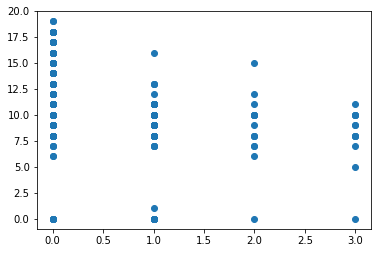

In [10]:
plt
plt.scatter(lang['failures'], lang['G3'])


In [11]:
from sklearn.feature_selection import SelectKBest, f_regression
selectKBestModel = SelectKBest(f_regression)
x_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences']
X = lang[x_cols]
y = lang['G3']

selectKBestModel.fit(X, y)

pd.DataFrame({
    'x_feature' : x_cols,
    'scores': selectKBestModel.scores_
}).sort_values('scores', ascending=False)
    


,x_feature,scores
5,failures,118.406123
4,studytime,43.055598
1,Medu,39.597729
2,Fedu,30.386973
9,Dalc,28.301925
10,Walc,20.832519
3,traveltime,10.635922
7,freetime,9.890471
0,age,7.423385
11,health,6.384592


Text(0, 0.5, 'G3 scores')

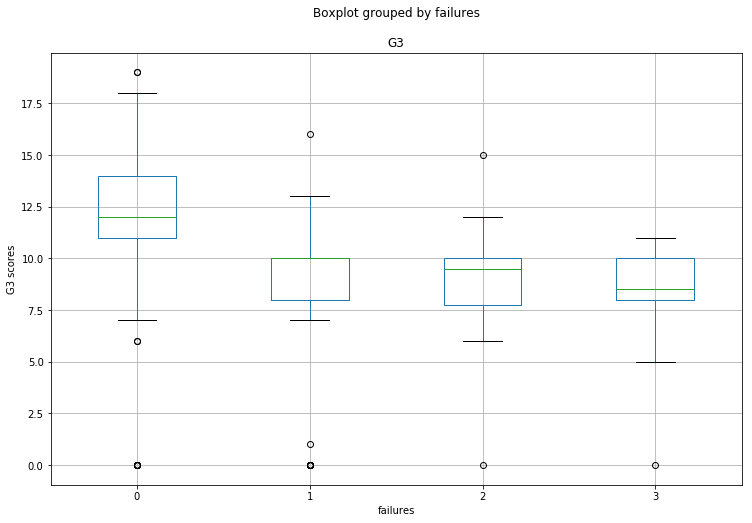

In [12]:
ax = lang.boxplot(by='failures', column='G3', figsize=(12,8))
ax.set_ylabel('G3 scores')

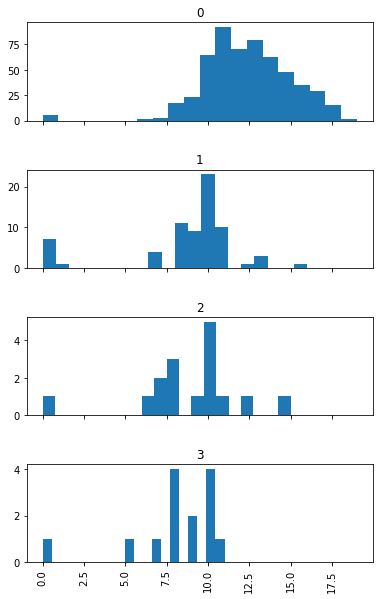

In [13]:

lang.hist(by='failures', column='G3', sharex=True,layout=(4, 1), figsize=(6, 10), bins=20)
plt.show()

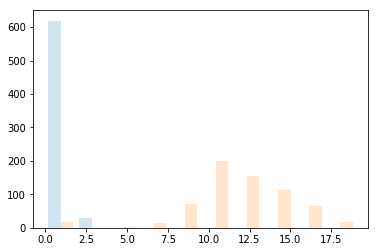

In [14]:
plt.hist([lang['failures'],lang['G3']],
          bins=10, alpha=0.2) 
plt.show()

In [15]:
from scipy import stats
#https://stackoverflow.com/a/22221675/1175496
g3_scores_for_each_failure_group_series = lang.groupby('failures')['G3'].apply(list)
g3_scores_for_each_failure_group_series


failures
0    [11, 11, 12, 14, 13, 13, 13, 13, 17, 13, 14, 1...
1    [11, 10, 11, 11, 9, 11, 10, 1, 9, 8, 10, 16, 8...
2    [11, 10, 0, 10, 8, 6, 15, 9, 12, 10, 10, 10, 8...
3      [7, 10, 8, 10, 11, 8, 10, 5, 8, 8, 10, 9, 9, 0]
Name: G3, dtype: object

In [16]:
import pprint
g3_scores_for_each_failure_group_series.values

array([list([11, 11, 12, 14, 13, 13, 13, 13, 17, 13, 14, 13, 12, 13, 15, 17, 14, 14, 12, 14, 12, 14, 10, 10, 12, 12, 11, 13, 12, 11, 15, 15, 12, 12, 11, 14, 13, 12, 12, 10, 11, 15, 10, 11, 13, 17, 13, 12, 13, 16, 9, 12, 13, 12, 15, 16, 14, 16, 16, 16, 10, 13, 12, 16, 12, 10, 11, 15, 11, 10, 11, 14, 11, 11, 11, 13, 11, 12, 9, 11, 13, 12, 12, 11, 15, 11, 10, 11, 13, 12, 14, 12, 13, 11, 12, 13, 13, 8, 16, 12, 10, 16, 10, 10, 14, 11, 14, 14, 11, 18, 10, 14, 16, 15, 14, 14, 13, 13, 13, 11, 9, 11, 15, 13, 12, 11, 13, 12, 14, 11, 11, 15, 10, 13, 12, 11, 11, 10, 14, 11, 9, 13, 11, 13, 11, 6, 12, 10, 13, 11, 8, 11, 13, 11, 13, 8, 11, 10, 8, 11, 18, 13, 17, 18, 10, 13, 15, 11, 14, 10, 11, 13, 11, 13, 17, 14, 16, 14, 11, 16, 14, 10, 13, 12, 12, 10, 12, 16, 14, 12, 11, 15, 12, 15, 13, 13, 12, 15, 13, 12, 12, 12, 13, 11, 11, 15, 10, 10, 13, 13, 11, 12, 14, 16, 8, 17, 11, 11, 16, 12, 13, 13, 14, 9, 12, 16, 10, 13, 9, 15, 10, 11, 13, 8, 15, 14, 15, 12, 15, 15, 12, 15, 11, 10, 11, 16, 11, 13, 10, 11, 

In [17]:
stats.f_oneway(*g3_scores_for_each_failure_group_series.values)

F_onewayResult(statistic=51.38582794045558, pvalue=8.644516356430469e-30)

In [18]:
stats.f_oneway(* lang.groupby('absences')['G3'].apply(list).values)

F_onewayResult(statistic=1.032406506449772, pvalue=0.42088789703425067)

In [19]:
stats.f_oneway(* lang.groupby('failures')['G3'].apply(list).values)

F_onewayResult(statistic=51.38582794045558, pvalue=8.644516356430469e-30)

In [20]:
stats.f_oneway(* lang.groupby('studytime')['G3'].apply(list).values)

F_onewayResult(statistic=15.876267993177121, pvalue=5.705728458962843e-10)

11.905096660808436
11.9125


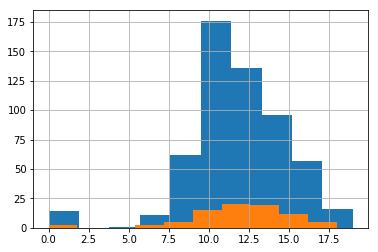

In [21]:
import matplotlib.pyplot as plt
 
# lang['famsize'].value_counts()
lang.loc[lang['Pstatus']=='T']['G3'].hist()
lang.loc[lang['Pstatus']=='A']['G3'].hist()
print(lang.loc[lang['Pstatus']=='T']['G3'].mean())
print(lang.loc[lang['Pstatus']=='A']['G3'].mean())

In [22]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
213,16,4,4,1,2,0,4,5,2,1,2,3,0
43,15,2,2,1,1,0,5,4,1,1,1,1,0
42,15,4,4,1,2,0,4,3,3,1,1,5,0
73,16,3,1,1,1,0,5,3,2,2,2,5,0
494,16,1,2,1,2,0,4,4,5,1,3,3,0


In [23]:
y_train = y_train.values.reshape(-1,1)

In [24]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train) 

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [25]:
y_test = y_test.values.reshape(-1,1)

In [26]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train_scaled, y_train_scaled)

test_score = model.score(X_test_scaled, y_test_scaled)
train_score = model.score(X_train_scaled, y_train_scaled)
print(f"R2 train Score: {train_score}, R2 test {test_score}")

R2 train Score: 0.26588175324617563, R2 test 0.19402589433226047


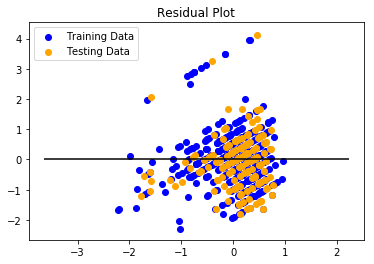

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [29]:
y_predicted = model.predict(X_test_scaled)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
rmse = mean_squared_error(y_test_scaled ,y_predicted)
r2= r2_score(y_test_scaled, y_predicted)

In [32]:
print('Slope:' , model.coef_)
print('Intercept:', model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[ 0.01706586  0.10510245  0.06094771 -0.05387959  0.14856261 -0.33641825
   0.07641093 -0.03207914 -0.03957588 -0.14743673  0.02741883 -0.08008559
   0.00141094]]
Intercept: [1.85835397e-16]
Root mean squared error:  0.7747189541220975
R2 score:  0.19402589433226047


In [33]:
X_test_scaled.shape

(163, 13)

In [34]:
y_predicted.shape

(163, 1)

In [35]:
X.shape

(649, 13)

In [36]:
y_predicted.shape

(163, 1)

In [37]:
import numpy as np

(163, 1)


Text(0, 0.5, 'y')

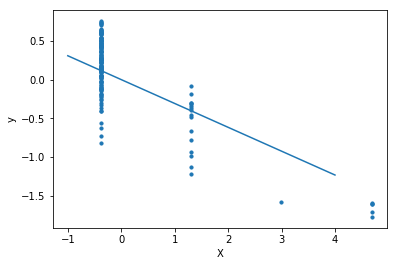

In [38]:
print(y_predicted.shape)
model.coef_[:,5]
failures_on_smooth_line = np.linspace(-1,4, 1000)
predicted_g3_on_smooth_line = [failure_point *-0.30805566 for failure_point in failures_on_smooth_line]

plt.scatter(X_test_scaled[:,5], y_predicted, s=10)
plt.plot(failures_on_smooth_line, predicted_g3_on_smooth_line)
plt.xlabel('X')
plt.ylabel('y')


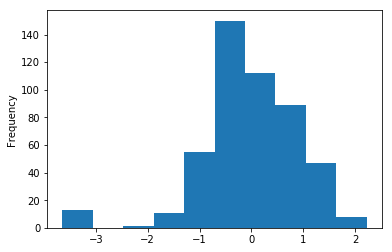

In [39]:
pd.Series(y_train_scaled.reshape(-1)).plot(kind='hist')

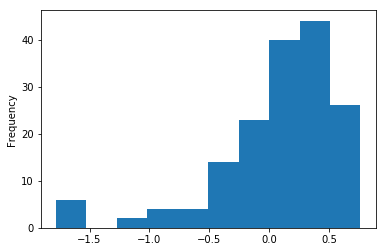

In [40]:
pd.Series(y_predicted.reshape(-1)).plot(kind='hist')

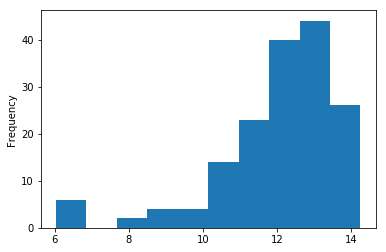

In [41]:
pd.Series(y_scaler.inverse_transform(y_predicted).reshape(-1)).plot(kind='hist')

In [42]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

Using TensorFlow backend.


In [44]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(13, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_7 (Dense)              (None, 100)               1400      
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 21,883
Trainable params: 21,883
Non-trainable params: 0
_________________________________________________________________


In [45]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [46]:
NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.
Train on 388 samples, validate on 98 samples
Epoch 1/500
388/388 [==============================] - 0s 1ms/step - loss: 11.5999 - mean_absolute_error: 11.5999 - val_loss: 11.6346 - val_mean_absolute_error: 11.6346

Epoch 00001: val_loss improved from inf to 11.63456, saving model to Weights-001--11.63456.hdf5
Epoch 2/500
388/388 [==============================] - 0s 65us/step - loss: 10.2425 - mean_absolute_error: 10.2425 - val_loss: 7.6859 - val_mean_absolute_error: 7.6859

Epoch 00002: val_loss improved from 11.63456 to 7.68591, saving model to Weights-002--7.68591.hdf5
Epoch 3/500
388/388 [==============================] - 0s 69us/step - loss: 4.3600 - mean_absolute_error: 4.3600 - val_loss: 2.6057 - val_mean_absolute_error: 2.6057

Epoch 00003: val_loss improved from 7.68591 to 2.60565, saving model to Weights-003--2.60565.hdf5
Epoch 4/500
388/388 [==============================] - 0s 107us/step - loss: 3.0467 - mean_absolute_error: 3

388/388 [==============================] - 0s 75us/step - loss: 2.1733 - mean_absolute_error: 2.1733 - val_loss: 1.8799 - val_mean_absolute_error: 1.8799

Epoch 00033: val_loss did not improve from 1.84978
Epoch 34/500
388/388 [==============================] - 0s 121us/step - loss: 2.1416 - mean_absolute_error: 2.1416 - val_loss: 2.0042 - val_mean_absolute_error: 2.0042

Epoch 00034: val_loss did not improve from 1.84978
Epoch 35/500
388/388 [==============================] - 0s 105us/step - loss: 2.1169 - mean_absolute_error: 2.1169 - val_loss: 2.0724 - val_mean_absolute_error: 2.0724

Epoch 00035: val_loss did not improve from 1.84978
Epoch 36/500
388/388 [==============================] - 0s 102us/step - loss: 2.0761 - mean_absolute_error: 2.0761 - val_loss: 1.9150 - val_mean_absolute_error: 1.9150

Epoch 00036: val_loss did not improve from 1.84978
Epoch 37/500
388/388 [==============================] - 0s 105us/step - loss: 2.0605 - mean_absolute_error: 2.0605 - val_loss: 1.8610 


Epoch 00068: val_loss did not improve from 1.82556
Epoch 69/500
388/388 [==============================] - 0s 93us/step - loss: 2.0550 - mean_absolute_error: 2.0550 - val_loss: 1.8541 - val_mean_absolute_error: 1.8541

Epoch 00069: val_loss did not improve from 1.82556
Epoch 70/500
388/388 [==============================] - 0s 83us/step - loss: 2.0269 - mean_absolute_error: 2.0269 - val_loss: 1.8642 - val_mean_absolute_error: 1.8642

Epoch 00070: val_loss did not improve from 1.82556
Epoch 71/500
388/388 [==============================] - 0s 87us/step - loss: 2.0831 - mean_absolute_error: 2.0831 - val_loss: 1.8768 - val_mean_absolute_error: 1.8768

Epoch 00071: val_loss did not improve from 1.82556
Epoch 72/500
388/388 [==============================] - 0s 81us/step - loss: 2.0776 - mean_absolute_error: 2.0776 - val_loss: 1.9653 - val_mean_absolute_error: 1.9653

Epoch 00072: val_loss did not improve from 1.82556
Epoch 73/500
388/388 [==============================] - 0s 85us/step - l

388/388 [==============================] - 0s 103us/step - loss: 2.0174 - mean_absolute_error: 2.0174 - val_loss: 1.9806 - val_mean_absolute_error: 1.9806

Epoch 00105: val_loss did not improve from 1.82053
Epoch 106/500
388/388 [==============================] - 0s 96us/step - loss: 2.0373 - mean_absolute_error: 2.0373 - val_loss: 2.0126 - val_mean_absolute_error: 2.0126

Epoch 00106: val_loss did not improve from 1.82053
Epoch 107/500
388/388 [==============================] - 0s 79us/step - loss: 1.9788 - mean_absolute_error: 1.9788 - val_loss: 1.8800 - val_mean_absolute_error: 1.8800

Epoch 00107: val_loss did not improve from 1.82053
Epoch 108/500
388/388 [==============================] - 0s 85us/step - loss: 1.9881 - mean_absolute_error: 1.9881 - val_loss: 1.9805 - val_mean_absolute_error: 1.9805

Epoch 00108: val_loss did not improve from 1.82053
Epoch 109/500
388/388 [==============================] - 0s 81us/step - loss: 2.0100 - mean_absolute_error: 2.0100 - val_loss: 1.8107

388/388 [==============================] - 0s 90us/step - loss: 1.9561 - mean_absolute_error: 1.9561 - val_loss: 1.9215 - val_mean_absolute_error: 1.9215

Epoch 00141: val_loss did not improve from 1.79011
Epoch 142/500
388/388 [==============================] - 0s 91us/step - loss: 2.0124 - mean_absolute_error: 2.0124 - val_loss: 1.9251 - val_mean_absolute_error: 1.9251

Epoch 00142: val_loss did not improve from 1.79011
Epoch 143/500
388/388 [==============================] - 0s 92us/step - loss: 1.9710 - mean_absolute_error: 1.9710 - val_loss: 1.8635 - val_mean_absolute_error: 1.8635

Epoch 00143: val_loss did not improve from 1.79011
Epoch 144/500
388/388 [==============================] - 0s 72us/step - loss: 1.9575 - mean_absolute_error: 1.9575 - val_loss: 1.8946 - val_mean_absolute_error: 1.8946

Epoch 00144: val_loss did not improve from 1.79011
Epoch 145/500
388/388 [==============================] - 0s 81us/step - loss: 2.0260 - mean_absolute_error: 2.0260 - val_loss: 1.7961 

388/388 [==============================] - 0s 73us/step - loss: 1.9629 - mean_absolute_error: 1.9629 - val_loss: 1.9500 - val_mean_absolute_error: 1.9500

Epoch 00177: val_loss did not improve from 1.76172
Epoch 178/500
388/388 [==============================] - 0s 65us/step - loss: 1.9930 - mean_absolute_error: 1.9930 - val_loss: 1.8086 - val_mean_absolute_error: 1.8086

Epoch 00178: val_loss did not improve from 1.76172
Epoch 179/500
388/388 [==============================] - 0s 92us/step - loss: 2.0338 - mean_absolute_error: 2.0338 - val_loss: 1.8410 - val_mean_absolute_error: 1.8410

Epoch 00179: val_loss did not improve from 1.76172
Epoch 180/500
388/388 [==============================] - 0s 84us/step - loss: 1.9897 - mean_absolute_error: 1.9897 - val_loss: 1.7879 - val_mean_absolute_error: 1.7879

Epoch 00180: val_loss did not improve from 1.76172
Epoch 181/500
388/388 [==============================] - 0s 87us/step - loss: 2.0023 - mean_absolute_error: 2.0023 - val_loss: 1.8269 

388/388 [==============================] - 0s 79us/step - loss: 1.9526 - mean_absolute_error: 1.9526 - val_loss: 1.8160 - val_mean_absolute_error: 1.8160

Epoch 00214: val_loss did not improve from 1.75694
Epoch 215/500
388/388 [==============================] - 0s 85us/step - loss: 1.9214 - mean_absolute_error: 1.9214 - val_loss: 1.7948 - val_mean_absolute_error: 1.7948

Epoch 00215: val_loss did not improve from 1.75694
Epoch 216/500
388/388 [==============================] - 0s 90us/step - loss: 1.9129 - mean_absolute_error: 1.9129 - val_loss: 1.7919 - val_mean_absolute_error: 1.7919

Epoch 00216: val_loss did not improve from 1.75694
Epoch 217/500
388/388 [==============================] - 0s 88us/step - loss: 1.9386 - mean_absolute_error: 1.9386 - val_loss: 1.9848 - val_mean_absolute_error: 1.9848

Epoch 00217: val_loss did not improve from 1.75694
Epoch 218/500
388/388 [==============================] - 0s 78us/step - loss: 1.9883 - mean_absolute_error: 1.9883 - val_loss: 1.7608 

388/388 [==============================] - 0s 86us/step - loss: 1.9143 - mean_absolute_error: 1.9143 - val_loss: 1.7633 - val_mean_absolute_error: 1.7633

Epoch 00250: val_loss did not improve from 1.74367
Epoch 251/500
388/388 [==============================] - 0s 87us/step - loss: 1.9098 - mean_absolute_error: 1.9098 - val_loss: 1.8007 - val_mean_absolute_error: 1.8007

Epoch 00251: val_loss did not improve from 1.74367
Epoch 252/500
388/388 [==============================] - 0s 91us/step - loss: 1.9565 - mean_absolute_error: 1.9565 - val_loss: 1.7734 - val_mean_absolute_error: 1.7734

Epoch 00252: val_loss did not improve from 1.74367
Epoch 253/500
388/388 [==============================] - 0s 85us/step - loss: 2.0062 - mean_absolute_error: 2.0062 - val_loss: 1.8343 - val_mean_absolute_error: 1.8343

Epoch 00253: val_loss did not improve from 1.74367
Epoch 254/500
388/388 [==============================] - 0s 75us/step - loss: 1.9957 - mean_absolute_error: 1.9957 - val_loss: 1.7613 

388/388 [==============================] - 0s 127us/step - loss: 1.8477 - mean_absolute_error: 1.8477 - val_loss: 1.8474 - val_mean_absolute_error: 1.8474

Epoch 00287: val_loss did not improve from 1.74234
Epoch 288/500
388/388 [==============================] - 0s 115us/step - loss: 1.8674 - mean_absolute_error: 1.8674 - val_loss: 1.7619 - val_mean_absolute_error: 1.7619

Epoch 00288: val_loss did not improve from 1.74234
Epoch 289/500
388/388 [==============================] - 0s 109us/step - loss: 1.8633 - mean_absolute_error: 1.8633 - val_loss: 1.8197 - val_mean_absolute_error: 1.8197

Epoch 00289: val_loss did not improve from 1.74234
Epoch 290/500
388/388 [==============================] - 0s 89us/step - loss: 1.8840 - mean_absolute_error: 1.8840 - val_loss: 1.7865 - val_mean_absolute_error: 1.7865

Epoch 00290: val_loss did not improve from 1.74234
Epoch 291/500
388/388 [==============================] - 0s 97us/step - loss: 1.9397 - mean_absolute_error: 1.9397 - val_loss: 1.76

388/388 [==============================] - 0s 68us/step - loss: 1.8431 - mean_absolute_error: 1.8431 - val_loss: 2.0783 - val_mean_absolute_error: 2.0783

Epoch 00324: val_loss did not improve from 1.74234
Epoch 325/500
388/388 [==============================] - 0s 62us/step - loss: 1.8267 - mean_absolute_error: 1.8267 - val_loss: 1.8069 - val_mean_absolute_error: 1.8069

Epoch 00325: val_loss did not improve from 1.74234
Epoch 326/500
388/388 [==============================] - 0s 60us/step - loss: 1.8309 - mean_absolute_error: 1.8309 - val_loss: 1.7990 - val_mean_absolute_error: 1.7990

Epoch 00326: val_loss did not improve from 1.74234
Epoch 327/500
388/388 [==============================] - 0s 53us/step - loss: 1.8507 - mean_absolute_error: 1.8507 - val_loss: 2.0022 - val_mean_absolute_error: 2.0022

Epoch 00327: val_loss did not improve from 1.74234
Epoch 328/500
388/388 [==============================] - 0s 51us/step - loss: 1.8521 - mean_absolute_error: 1.8521 - val_loss: 1.7876 

388/388 [==============================] - 0s 53us/step - loss: 1.8578 - mean_absolute_error: 1.8578 - val_loss: 1.9274 - val_mean_absolute_error: 1.9274

Epoch 00361: val_loss did not improve from 1.74234
Epoch 362/500
388/388 [==============================] - 0s 50us/step - loss: 1.8187 - mean_absolute_error: 1.8187 - val_loss: 1.8798 - val_mean_absolute_error: 1.8798

Epoch 00362: val_loss did not improve from 1.74234
Epoch 363/500
388/388 [==============================] - 0s 56us/step - loss: 1.8600 - mean_absolute_error: 1.8600 - val_loss: 1.9747 - val_mean_absolute_error: 1.9747

Epoch 00363: val_loss did not improve from 1.74234
Epoch 364/500
388/388 [==============================] - 0s 169us/step - loss: 1.8103 - mean_absolute_error: 1.8103 - val_loss: 1.8568 - val_mean_absolute_error: 1.8568

Epoch 00364: val_loss did not improve from 1.74234
Epoch 365/500
388/388 [==============================] - 0s 79us/step - loss: 1.8508 - mean_absolute_error: 1.8508 - val_loss: 1.8997

388/388 [==============================] - 0s 104us/step - loss: 1.7964 - mean_absolute_error: 1.7964 - val_loss: 1.8103 - val_mean_absolute_error: 1.8103

Epoch 00398: val_loss did not improve from 1.74234
Epoch 399/500
388/388 [==============================] - 0s 100us/step - loss: 1.7948 - mean_absolute_error: 1.7948 - val_loss: 1.8150 - val_mean_absolute_error: 1.8150

Epoch 00399: val_loss did not improve from 1.74234
Epoch 400/500
388/388 [==============================] - 0s 113us/step - loss: 1.8207 - mean_absolute_error: 1.8207 - val_loss: 1.8580 - val_mean_absolute_error: 1.8580

Epoch 00400: val_loss did not improve from 1.74234
Epoch 401/500
388/388 [==============================] - 0s 100us/step - loss: 1.8000 - mean_absolute_error: 1.8000 - val_loss: 1.8171 - val_mean_absolute_error: 1.8171

Epoch 00401: val_loss did not improve from 1.74234
Epoch 402/500
388/388 [==============================] - 0s 81us/step - loss: 1.8084 - mean_absolute_error: 1.8084 - val_loss: 1.8

388/388 [==============================] - 0s 140us/step - loss: 1.7836 - mean_absolute_error: 1.7836 - val_loss: 1.8349 - val_mean_absolute_error: 1.8349

Epoch 00435: val_loss did not improve from 1.74234
Epoch 436/500
388/388 [==============================] - 0s 111us/step - loss: 1.7791 - mean_absolute_error: 1.7791 - val_loss: 1.8404 - val_mean_absolute_error: 1.8404

Epoch 00436: val_loss did not improve from 1.74234
Epoch 437/500
388/388 [==============================] - 0s 104us/step - loss: 1.8096 - mean_absolute_error: 1.8096 - val_loss: 1.9940 - val_mean_absolute_error: 1.9940

Epoch 00437: val_loss did not improve from 1.74234
Epoch 438/500
388/388 [==============================] - 0s 102us/step - loss: 1.9230 - mean_absolute_error: 1.9230 - val_loss: 1.8236 - val_mean_absolute_error: 1.8236

Epoch 00438: val_loss did not improve from 1.74234
Epoch 439/500
388/388 [==============================] - 0s 121us/step - loss: 1.8179 - mean_absolute_error: 1.8179 - val_loss: 1.

388/388 [==============================] - 0s 55us/step - loss: 1.7895 - mean_absolute_error: 1.7895 - val_loss: 1.8656 - val_mean_absolute_error: 1.8656

Epoch 00472: val_loss did not improve from 1.74234
Epoch 473/500
388/388 [==============================] - 0s 70us/step - loss: 1.8104 - mean_absolute_error: 1.8104 - val_loss: 1.9712 - val_mean_absolute_error: 1.9712

Epoch 00473: val_loss did not improve from 1.74234
Epoch 474/500
388/388 [==============================] - 0s 74us/step - loss: 1.9960 - mean_absolute_error: 1.9960 - val_loss: 1.8534 - val_mean_absolute_error: 1.8534

Epoch 00474: val_loss did not improve from 1.74234
Epoch 475/500
388/388 [==============================] - 0s 70us/step - loss: 1.8344 - mean_absolute_error: 1.8344 - val_loss: 1.8743 - val_mean_absolute_error: 1.8743

Epoch 00475: val_loss did not improve from 1.74234
Epoch 476/500
388/388 [==============================] - 0s 83us/step - loss: 1.8284 - mean_absolute_error: 1.8284 - val_loss: 1.8753 

In [47]:
model = RandomForestRegressor()
model.fit(X_train,y_train)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [48]:
# Get the mean absolute error on the validation data
# predicted_performance =

print('RandomForestRegressor test r2 = ',  r2_score(y_test ,  model.predict(X_test)))
print('NN_model test r2 = ',  r2_score(y_test ,  NN_model.predict(X_test)))

print('RandomForestRegressor train  r2 = ',  r2_score(y_train ,  model.predict(X_train)))
print('NN_model train  r2 = ',  r2_score(y_train ,  NN_model.predict(X_train)))

print('RandomForestRegressor MAE = ',  mean_absolute_error(y_test ,  model.predict(X_test)))
print('NN_model MAE = ',  mean_absolute_error(y_test ,  NN_model.predict(X_test)))

RandomForestRegressor test r2 =  0.07768115833806277
NN_model test r2 =  0.1181166323431001
RandomForestRegressor train  r2 =  0.8488257414734639
NN_model train  r2 =  0.3540593321211678
RandomForestRegressor MAE =  2.263803680981595
NN_model MAE =  2.2216741058724057


In [49]:
print(NN_model.evaluate(X_train, y_train))
print(NN_model.evaluate(X_test, y_test))

486/486 [==============================] - 0s 32us/step
[1.7791800096692372, 1.7791800096692372]
163/163 [==============================] - 0s 48us/step
[2.2216741117231686, 2.2216741117231686]


In [50]:

predicted_performance = model.predict(X_test)
print(predicted_performance)

[13.  13.3 14.4 14.4 10.8 14.3 15.3  7.8 11.6 12.2 11.6 12.4 14.4 12.7
 11.8 14.  11.4 12.8 12.2 13.8 13.4 12.9 13.9 13.  14.2 12.5  9.2 14.
 11.9 12.8 11.9 13.7  9.2  5.  13.1 14.4 12.2 13.3 14.8 10.  13.8 15.7
 13.7 14.  13.  10.3 12.2 14.7 15.3 10.4  9.1 13.6 11.7 12.  10.8 13.9
 11.7 11.7  9.5  8.6  5.  12.5 15.4 11.9 14.9 14.2  5.3  8.1  6.1 11.3
 14.2 13.7 15.4 10.8 14.1 13.3 11.8 13.9 11.4  9.7  8.3 13.5 11.5 10.2
 10.6 11.6 12.1 14.2 12.6 11.7 12.4  7.1 11.4 14.1 11.9 14.1 14.4 11.2
 13.6 13.5 12.1 12.5 12.3  8.7 12.9 13.5 11.2 13.5 10.4 12.9 12.8 15.1
 12.1 12.   8.  14.8 10.8 12.5  9.6  9.8 11.9 15.1 11.5 13.6 13.2 13.
 13.2 13.2 14.6 11.8 12.6 10.6 15.  11.3 10.2  8.9  8.  10.8 10.8 11.9
 13.1 12.7 11.8 10.6 13.  13.7 10.5 13.  12.9 10.7 12.  11.6 11.2 14.2
 14.5 10.9 12.7 13.7 10.7 12.9  9.8 13.8 12.8]


In [51]:
 
XGBModel = XGBRegressor()
XGBModel.fit(X_train,y_train , verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(X_test)
MAE = mean_absolute_error(y_test , XGBpredictions)
print('XGBoost validation MAE = ',MAE)

[17:27:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost validation MAE =  2.1778348911027967
